<a href="https://colab.research.google.com/github/Anastasiia-cn/Python_for_analytics_HW/blob/main/Kabanova_hw_4_4_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('/content/drive/MyDrive/Python_DA_course_HW/viz/data/yulu_rental.csv')

In [83]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,5


1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

<Axes: >

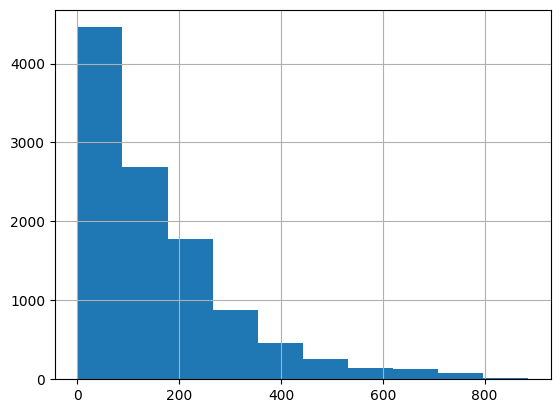

In [69]:
df['registered'].hist()

Це експоненціальний розподіл, що характерний для соціальних явищ, тобто менші значення будуть знаходитися у нижній частині діапазону, кількість значень у розподілі зменшується зі зростанням величини в діапазоні. У нашому випадку найбільше зареєстрованих користувачів було у години-пік, яких можу бути декілька на день, тому найбільші кількості зареєстрованих користувачів, що користувались сервісом у певну годину, знаходяться у кінці діапазону.

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

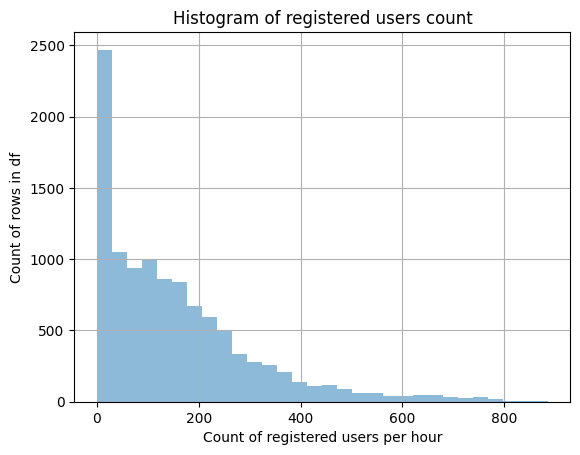

In [70]:
df['registered'].hist(bins=30, alpha=.5)
plt.title('Histogram of registered users count')
plt.xlabel('Count of registered users per hour')
plt.ylabel('Count of rows in df');

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [71]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [72]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [73]:
df[['datetime','dayofweek']][df.dayofweek==0].head()


,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [74]:
null_regiestered_df = df[df['registered'] == 0].groupby('dayofweek').size().reset_index(name='count')
null_regiestered_df

,dayofweek,count
0,0,5
1,1,3
2,2,2
3,3,1
4,4,1
5,5,1
6,6,2


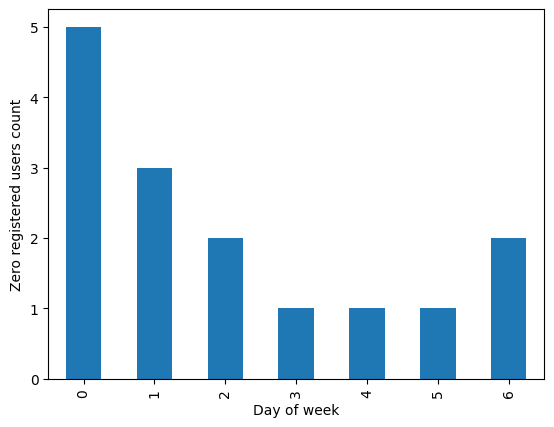

In [84]:
null_regiestered_df['count'].plot.bar()
plt.xlabel('Day of week')
plt.ylabel('Zero registered users count');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [76]:
weather_reg_users = df.groupby('weather')['registered'].sum().reset_index()
weather_reg_users

,weather,registered
0,1,1186163
1,2,419914
2,3,87106
3,4,158


<Axes: xlabel='weather'>

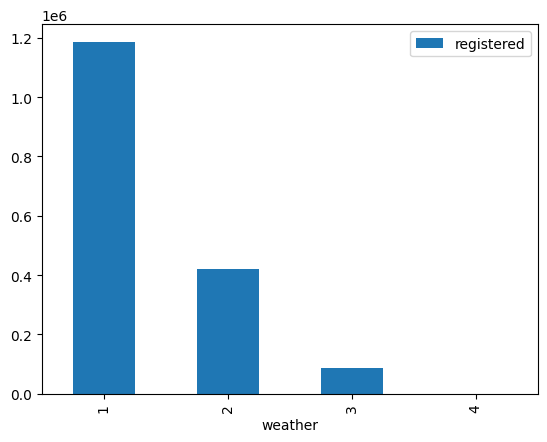

In [77]:
weather_reg_users.plot.bar(x='weather', y='registered')

1. Ясно, Мало хмарно, частково хмарно
2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман

Якщо подивитися на опис погодних умов, можна зробити висновок, що побудована візуалізація має логічний сенс, чим гірші погодні умови - тим менше користувачів користуються послугою прокату велосипедів.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

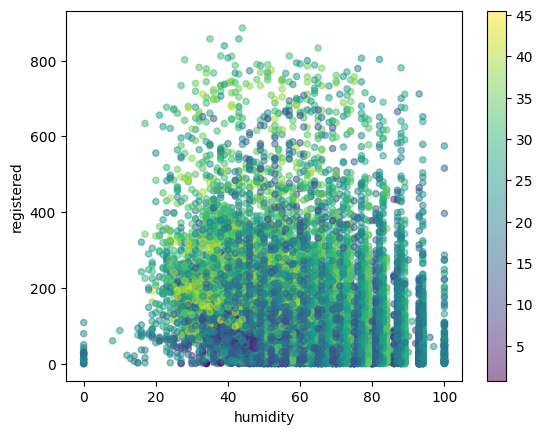

In [82]:
df.plot.scatter('humidity', 'registered', c=df.atemp, cmap='viridis', alpha=0.5)
plt.ylabel('humidity')
plt.ylabel('registered');

З даної візуалізації можна побачити, що зміна вологості повітря не сильно впливає на аренду велосипедів.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)